# Wrangling the Hunger score data
- integrating and viewing two datasets:  
    - administrative boundaries of East African countries (Sudan, South Sudan, Ethiopia, Kenya, Somalia, Uganda, Tanzania)  
    - Food insecurity scores for regions (not alligned with administrative boundaries) from [FEWS NET](https://fews.net/fews-data/333) from 2009-2019.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Load data

In [3]:
regions = gpd.read_file('./regions.geojson')

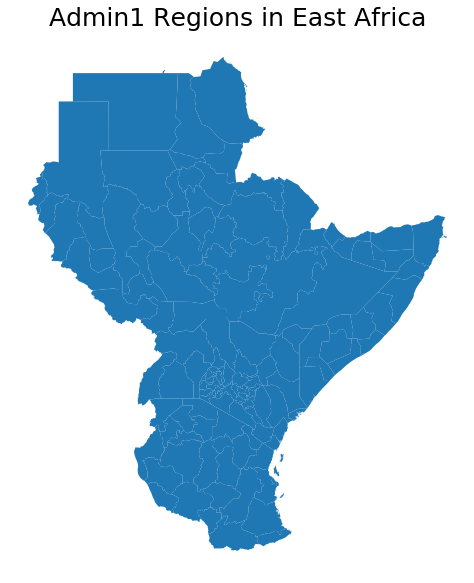

In [4]:
fig, ax = plt.subplots(1, figsize=(10, 10))

# clear plot borders
ax.axis('off')

ax.set_title("Admin1 Regions in East Africa", 
             fontdict={'fontsize': '25', 'fontweight' : '3'})

regions.plot(ax=ax)

In [5]:
regions.geometry.dtype

### 1.2 Iteratively load hunger score data and build data frame

In [6]:
years = [x+2000 for x in range(9,20)]

In [7]:
months = range(1,13)

In [8]:
scores = gpd.GeoDataFrame()
cnt = 0

for year in years:
    for month in months:
        
        # format the file request by time period of recorded hunger scores
        if month < 10:
            period = str(year) + '0' + str(month)
        else:
            period = str(year) + str(month)
        
        # read the file in if it exists
        try:
            period_scores = gpd.read_file('./FEWSNET/East Africa/EA_' + \
                                          period + '_CS.shp')
        except:
            continue
            
        # add time columns
        period_scores['year'] = year
        period_scores['month'] = month
        # append to the total dataframe
        scores = scores.append(period_scores, sort=True)
        cnt += 1
        
print(f'{cnt} files combined into one score file')
scores.sample(10)

38 files combined into one score file


,CS,HA0,geometry,month,year
1,2.0,0.0,"MULTIPOLYGON (((39.36784 -4.65351, 39.36945 -4...",4,2013
7,3.0,1.0,"MULTIPOLYGON (((33.66052 4.85207, 33.63518 4.7...",10,2019
3,3.0,0.0,"MULTIPOLYGON (((33.15660 4.28529, 33.28068 4.1...",10,2018
1,1.0,1.0,"MULTIPOLYGON (((38.78804 7.68957, 38.78876 7.6...",10,2014
1,2.0,NaN,"MULTIPOLYGON (((37.42798 -5.80168, 37.43291 -5...",4,2011
0,1.0,NaN,"MULTIPOLYGON (((40.42789 -10.38034, 40.42349 -...",4,2010
1,2.0,0.0,"MULTIPOLYGON (((39.36784 -4.65351, 39.36945 -4...",7,2013
2,2.0,1.0,"MULTIPOLYGON (((26.93215 8.87973, 26.94462 8.8...",10,2018
2,1.0,1.0,"MULTIPOLYGON (((23.25022 11.37219, 23.21659 11...",10,2019
1,1.0,1.0,"MULTIPOLYGON (((42.78954 3.30069, 42.71921 3.2...",2,2018


In [9]:
scores.shape

(289, 5)

## 2 Clean scores data and view it
- Remove hunger values above 5 (ie missing or alternative land uses).  
- 

In [10]:
scores_c = scores[scores['CS'] <= 5]

Text(0.5, 1.0, 'Hunger in East Africa over Time')

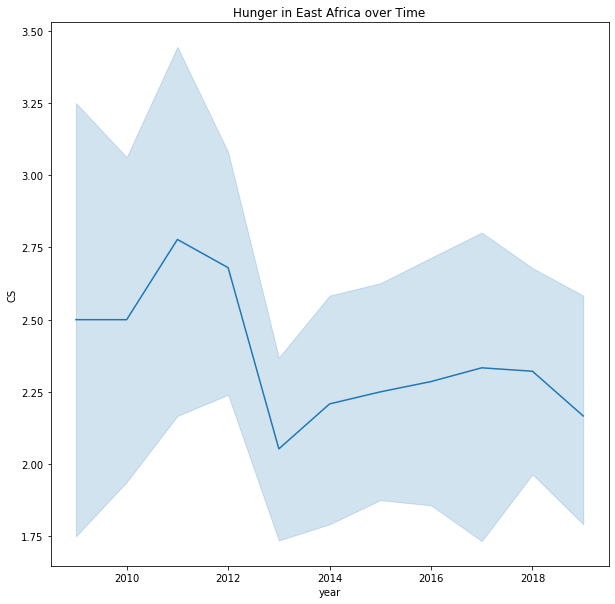

In [11]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.lineplot(x='year', y='CS', data=scores_c)
plt.title('Hunger in East Africa over Time')

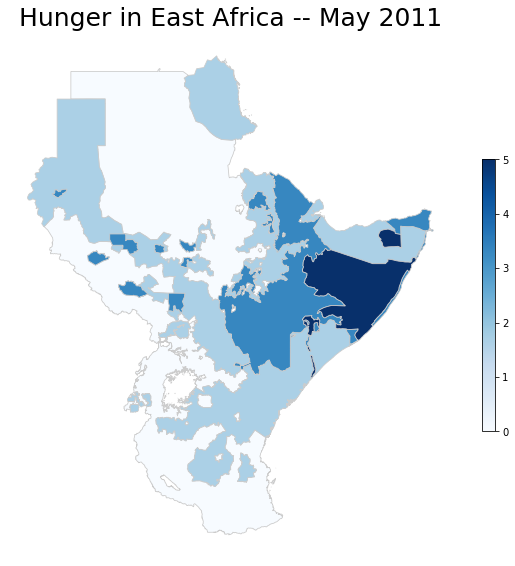

In [38]:
# subset the data
scores20114 = scores_c[(scores_c['year']==2011) & (scores_c['month']==4)]

# Set plot size
fig, ax = plt.subplots(1, figsize=(10, 10))

# clear plot borders
ax.axis('off')

# customize plot title
ax.set_title("Hunger in East Africa -- May 2011", 
             fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot choropleth
scores20114.plot(column='CS', cmap='Blues', linewidth=0.8, edgecolor='0.8', ax=ax)

# Create colorbar as a legend, set the mni and max 
sm = plt.cm.ScalarMappable(cmap='Blues',
                          norm=plt.Normalize(
                              vmin=0, 
                              vmax=5))
# add the colorbar to the figure, and shrink it
cbar = fig.colorbar(sm, shrink=0.5)

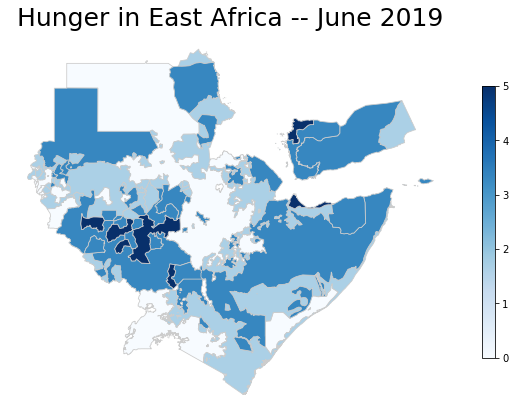

In [12]:
# subset the data
scores20196 = scores_c[(scores_c['year']==2019) & (scores_c['month']==6)]

# Set plot size
fig, ax = plt.subplots(1, figsize=(10, 10))

# clear plot borders
ax.axis('off')

# customize plot title
ax.set_title("Hunger in East Africa -- June 2019", 
             fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot choropleth
scores20196.plot(column='CS', cmap='Blues', linewidth=0.8, edgecolor='0.8', ax=ax)

# Create colorbar as a legend, set the mni and max 
sm = plt.cm.ScalarMappable(cmap='Blues',
                          norm=plt.Normalize(
                              vmin=0, 
                              vmax=5))
# add the colorbar to the figure, and shrink it
cbar = fig.colorbar(sm, shrink=0.5)

## 2 Merge data

In [21]:
region_scores = gpd.sjoin(regions, scores_c, how='left', op='intersects')
print(region_scores.shape)
region_scores.sample(10)

(10129, 8)


,ADMIN0,ADMIN1,geometry,index_right,CS,HA0,month,year
54,Kenya,Kericho,"POLYGON ((35.46713 0.02535, 35.47152 0.01796, ...",0.0,1.0,0.0,6.0,2017.0
6,Ethiopia,Oromia,"POLYGON ((39.81973 9.13948, 39.82638 9.13997, ...",2.0,2.0,1.0,4.0,2012.0
45,Kenya,Bungoma,"POLYGON ((34.61809 1.10215, 34.62033 1.10018, ...",0.0,1.0,0.0,10.0,2016.0
102,Somalia,Mudug,"POLYGON ((49.50000 7.57000, 49.64971 7.39783, ...",4.0,2.0,1.0,10.0,2019.0
104,Somalia,Sanaag,"POLYGON ((48.70194 11.30749, 48.71615 11.30546...",2.0,3.0,NaN,10.0,2009.0
67,Kenya,Meru,"POLYGON ((38.14413 0.42177, 38.15994 0.37654, ...",3.0,3.0,0.0,4.0,2012.0
120,Tanzania,Tanga,"MULTIPOLYGON (((38.80098 -5.96314, 38.79755 -5...",4.0,2.0,0.0,6.0,2019.0
78,Kenya,Samburu,"POLYGON ((36.75991 2.51235, 36.76614 2.49117, ...",6.0,3.0,0.0,10.0,2019.0
24,Sudan,South Darfur,"POLYGON ((24.42157 13.13091, 24.43912 13.11579...",3.0,3.0,0.0,7.0,2015.0
23,Sudan,Sinnar,"POLYGON ((33.85964 14.03019, 33.92647 14.00591...",2.0,1.0,1.0,6.0,2018.0


### 2.2 Join back to retain geometric data

In [22]:
# drop unnecessary columns
region_scores = region_scores.drop(['HA0', 'index_right'],axis=1)

In [29]:
region_scores_agg = region_scores.groupby(by=['ADMIN0', 'ADMIN1', 'year', 'month'],
                                         sort=False).mean()
print(region_scores_agg.shape)
region_scores_agg.sample(10)

(4312, 1)


CS
ADMIN0      ADMIN1                  year   month          
Sudan       Khartoum                2010.0 7.0    2.000000
Kenya       Samburu                 2017.0 10.0   2.000000
South Sudan Northern Bahr el Ghazal 2014.0 1.0    1.500000
Sudan       Central Darfur          2017.0 6.0    2.166667
Kenya       Mombasa                 2010.0 7.0    2.000000
Sudan       East Darfur             2019.0 2.0    2.400000
Kenya       Homa Bay                2018.0 12.0   1.000000
            Migori                  2012.0 7.0    1.000000
            Meru                    2011.0 10.0   2.500000
Ethiopia    Afar                    2011.0 4.0    2.500000

In [30]:
region_scores_final = region_scores.merge(region_scores_agg, \
                                          on=['ADMIN0', 'ADMIN1', 'year', 'month'])
print(region_scores_final.shape)
region_scores_final.sample(10)

(10124, 7)


,ADMIN0,ADMIN1,geometry,CS_x,month,year,CS_y
6992,Kenya,Samburu,"POLYGON ((36.75991 2.51235, 36.76614 2.49117, ...",3.0,7.0,2009.0,3.000000
2921,Sudan,West Kordofan,"POLYGON ((28.08111 14.05614, 28.07985 14.05091...",4.0,7.0,2012.0,2.500000
942,Ethiopia,Tigray,"POLYGON ((39.99758 14.45305, 39.98742 14.43717...",1.0,6.0,2018.0,1.666667
6953,Kenya,Nyeri,"POLYGON ((37.07852 -0.00047, 37.08114 -0.00566...",1.0,10.0,2015.0,1.000000
8178,Somalia,Bari,"POLYGON ((50.79877 11.98356, 50.80576 11.97939...",4.0,10.0,2017.0,3.000000
9410,Somalia,Togdheer,"POLYGON ((46.92000 8.78158, 46.92000 8.76000, ...",2.0,4.0,2013.0,2.000000
2808,Sudan,West Darfur,"POLYGON ((22.87698 14.89604, 22.86786 14.84956...",2.0,7.0,2012.0,2.333333
6248,Kenya,Marsabit,"POLYGON ((36.31146 4.44854, 36.36097 4.44803, ...",1.0,6.0,2018.0,2.000000
3062,Sudan,White Nile,"POLYGON ((32.46044 15.22508, 32.46752 15.22270...",2.0,10.0,2017.0,2.250000
7668,Kenya,Wajir,"POLYGON ((39.78616 3.41756, 39.78634 3.34273, ...",2.0,4.0,2012.0,2.333333


## 3 Clean - Remove unnecessary columns and duplicates

In [31]:
region_scores_final['CS'] = region_scores_final['CS_y']
region_scores_final = region_scores_final.drop(['CS_x', 'CS_y'], axis=1)
print(region_scores_final.shape)
region_scores_final.sample(5)

(10124, 6)


,ADMIN0,ADMIN1,geometry,month,year,CS
8847,Somalia,Middle Juba,"POLYGON ((42.98000 1.46000, 43.26012 1.04466, ...",10.0,2012.0,2.666667
9151,Somalia,Nugaal,"POLYGON ((49.81205 8.42315, 49.84000 8.33000, ...",7.0,2011.0,3.500000
7645,Kenya,Wajir,"POLYGON ((39.78616 3.41756, 39.78634 3.34273, ...",7.0,2015.0,1.666667
8978,Somalia,Middle Shabelle,"POLYGON ((46.39000 3.89000, 47.03662 3.47106, ...",7.0,2014.0,3.000000
1355,Sudan,Blue Nile,"POLYGON ((34.48300 12.54923, 34.49492 12.54164...",6.0,2017.0,2.000000


In [32]:
unit = ['ADMIN0', 'ADMIN1', 'year', 'month']
region_scores_cleaned = region_scores_final.drop_duplicates(subset=unit)
print(region_scores_cleaned.shape)
region_scores_cleaned.sample(5)

(4312, 6)


,ADMIN0,ADMIN1,geometry,month,year,CS
8162,Somalia,Bari,"POLYGON ((50.79877 11.98356, 50.80576 11.97939...",4.0,2015.0,2.0
6516,Kenya,Murang'a,"POLYGON ((36.74594 -0.56975, 36.74997 -0.57127...",1.0,2014.0,1.5
6383,Kenya,Migori,"POLYGON ((34.60073 -0.65202, 34.60311 -0.65306...",1.0,2010.0,1.5
462,Ethiopia,Gambela,"POLYGON ((34.35060 8.38018, 34.39734 8.40387, ...",10.0,2012.0,2.0
7603,Kenya,Wajir,"POLYGON ((39.78616 3.41756, 39.78634 3.34273, ...",1.0,2010.0,2.5


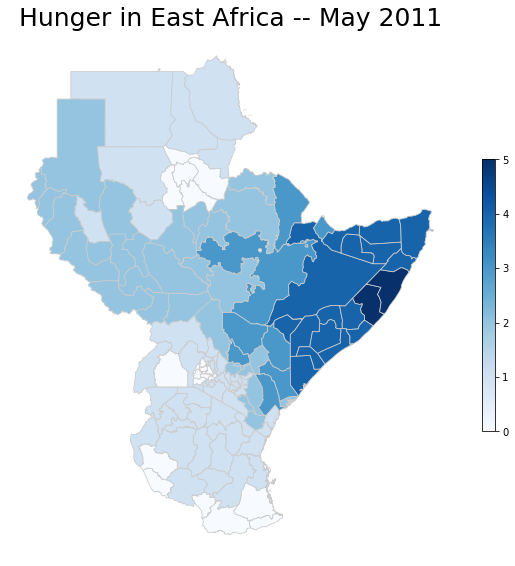

In [37]:
# subset the data
scores20114 = region_scores_cleaned[(region_scores_cleaned['year']==2011) & (region_scores_cleaned['month']==4)]

# Set plot size
fig, ax = plt.subplots(1, figsize=(10, 10))

# clear plot borders
ax.axis('off')

# customize plot title
ax.set_title("Hunger in East Africa -- May 2011", 
             fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot choropleth
scores20114.plot(column='CS', cmap='Blues', linewidth=0.8, edgecolor='0.8', ax=ax)

# Create colorbar as a legend, set the mni and max 
sm = plt.cm.ScalarMappable(cmap='Blues',
                          norm=plt.Normalize(
                              vmin=0, 
                              vmax=5))
# add the colorbar to the figure, and shrink it
cbar = fig.colorbar(sm, shrink=0.5)

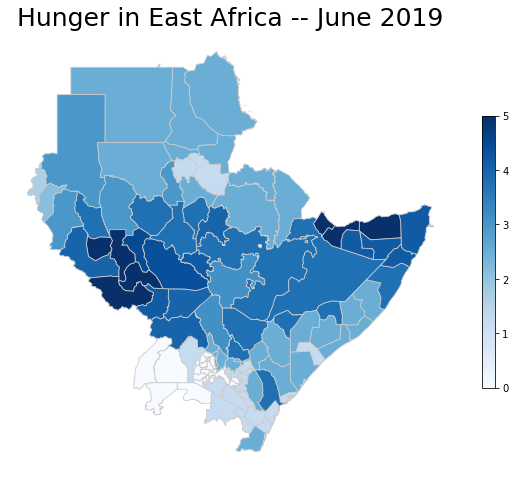

In [39]:
# subset the data
scores20196 = region_scores_cleaned[(region_scores_cleaned['year']==2019) & (region_scores_cleaned['month']==6)]

# Set plot size
fig, ax = plt.subplots(1, figsize=(10, 10))

# clear plot borders
ax.axis('off')

# customize plot title
ax.set_title("Hunger in East Africa -- June 2019", 
             fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot choropleth
scores20196.plot(column='CS', cmap='Blues', linewidth=0.8, edgecolor='0.8', ax=ax)

# Create colorbar as a legend, set the mni and max 
sm = plt.cm.ScalarMappable(cmap='Blues',
                          norm=plt.Normalize(
                              vmin=0, 
                              vmax=5))
# add the colorbar to the figure, and shrink it
cbar = fig.colorbar(sm, shrink=0.5)

__Comparing the food insecurity maps at the admin1 level to the original hunger maps, we see that the geolocation of the hunger score translates with relative accuracy.__

## 4 Write to disc

In [40]:
region_scores_cleaned.to_file('region_scores.geojson', driver='GeoJSON')